In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
df_police = pd.read_csv('./Datasets/police.csv')
df_population = pd.read_csv('./Datasets/population.csv')
df_race = pd.read_csv('./Datasets/race.csv')
population_2020 = 331449281

In [ ]:
# df_police

In [ ]:
# df_population

In [ ]:
# df_race

In [ ]:
# plt.figure(figsize=(16, 4))

# age_plot = sns.histplot(data=df_police, x='age', binwidth=4)

# age_plot.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
# age_plot.set_yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
# age_plot.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
# age_plot.set_yticklabels([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])

# age_plot.set_xlabel('Age')
# age_plot.set_title('Age Range')

# #plt.savefig('./age_plot.jpg')
# plt.show()

In [ ]:
# This is shootings in each state without the ratio.

sns.catplot(data=df_police.sort_values(by='state'), x='state', kind='count',height=5, aspect=3)
plt.show()

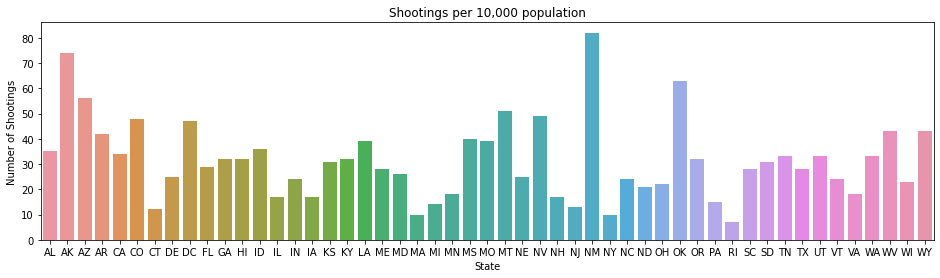

In [3]:
# This is shootings in each state with the ratio.

population_dict = {}
for city, num in zip(df_population['abbreviation'], df_population['population'] / 10000):
    population_dict[city] = num

# population_dict

percentage_dict = {'state': [], 'percentage': [], 'state_name': []}
for city in population_dict:
    percentage = df_police['state'].value_counts()[city] / population_dict[city] * 100
    percentage = round(percentage)
    percentage_dict['state'].append(city)
    percentage_dict['percentage'].append(percentage)
    


    
for state in df_population['state']:
    percentage_dict['state_name'].append(state)


df_percentage = pd.DataFrame.from_dict(percentage_dict)
percentage_dict

plt.figure(figsize=(16, 4))

percentage_plot = sns.barplot(data=df_percentage, x='state', y='percentage')
percentage_plot.set_title('Shootings per 10,000 population')
percentage_plot.set_xlabel('State')
percentage_plot.set_ylabel('Number of Shootings')

#plt.savefig('./Shootings_per_10000.jpg')
plt.show()

In [ ]:
# Race pie chart

df_race_percentage_local = round((df_police['race'].value_counts().sort_values() / 9096) * 100, 2)
df_race_percentage_local = df_race_percentage_local.reset_index()
df_race_percentage_local.rename(columns={'index': 'race', 'race': 'percentage'}, inplace=True)
df_race_percentage_local

In [ ]:
# Race pie chart
df_race_percentage_global = {'race': [], 'percentage': []}

for race, num_of_shooting in df_police['race'].value_counts().sort_values().iteritems():
    percentage_global = (num_of_shooting / (df_race.loc[df_race['race'] == race, 'population'].item())) * 100
    df_race_percentage_global['race'].append(race)
    df_race_percentage_global['percentage'].append(percentage_global)

df_race_percentage_global = pd.DataFrame.from_dict(df_race_percentage_global)
df_race_percentage_global

In [ ]:
# df_police['armed_or_unarmed'].value_counts()
# unarmed_mask = df_police['armed_or_unarmed'] == 'Unarmed/Did Not Have Actual Weapon'

# df_police[unarmed_mask]['state'].value_counts()

In [5]:
df_percentage

,state,percentage,state_name
0,AL,35,Alabama
1,AK,74,Alaska
2,AZ,56,Arizona
3,AR,42,Arkansas
4,CA,34,California
5,CO,48,Colorado
6,CT,12,Connecticut
7,DE,25,Delaware
8,DC,47,District of Columbia
9,FL,29,Florida


In [8]:
df_state = df_police['state'].value_counts().reset_index()
df_state.rename(columns={'index': 'state', 'state': 'num_of_shootings'}, inplace=True)

df_state

,state,num_of_shootings
0,CA,1336
1,TX,823
2,FL,628
3,AZ,404
4,GA,337
5,CO,274
6,OH,256
7,NC,253
8,WA,253
9,OK,250


In [18]:
df_shootings = df_population.copy()
df_shootings['total_shootings'] = 0
df_shootings['percentage'] = 0

for state in df_state['state']:
    df_shootings.loc[df_shootings['abbreviation'] == state, 'total_shootings'] = df_state.loc[df_state['state'] == state, 'num_of_shootings'].item()
    df_shootings.loc[df_shootings['abbreviation'] == state, 'percentage'] = df_percentage.loc[df_percentage['state'] == state, 'percentage'].item()
 

In [19]:
df_shootings

,state,abbreviation,population,lat,long,total_shootings,percentage
0,Alabama,AL,4903185,32.377716,-86.300568,173,35
1,Alaska,AK,731545,58.301598,-134.420212,54,74
2,Arizona,AZ,7278717,33.448143,-112.096962,404,56
3,Arkansas,AR,3017804,34.746613,-92.288986,127,42
4,California,CA,39512223,38.576668,-121.493629,1336,34
5,Colorado,CO,5758736,39.739227,-104.984856,274,48
6,Connecticut,CT,3565287,41.764046,-72.682198,43,12
7,Delaware,DE,973764,39.157307,-75.519722,24,25
8,District of Columbia,DC,705749,38.895110,-77.036370,33,47
9,Florida,FL,21477737,30.438118,-84.281296,628,29
